In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('modified.csv')

In [3]:
df.interpolate(method ='linear', limit_direction ='backward', limit = 1)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.00,NaN,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,2.000000,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.000000,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,7.25,5.000000,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.00,8.000000,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
142189,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
142190,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
142191,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,53.0,24.0,1021.0,1016.8,3.20,2.833333,12.5,26.1,No,No


In [4]:
df.interpolate(method ='linear', limit_direction ='forward', limit = 1)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.00,NaN,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,7.75,NaN,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,5.0,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.00,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
142189,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
142190,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
142191,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


In [5]:
df.isna().sum()

Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

In [6]:
#replacing the NA with mean of the particular column 
df.fillna(df.mean(skipna=True),inplace=True)

In [7]:
df['Location'].fillna(method='bfill',inplace=True)
df['WindGustDir'].fillna(method='bfill',inplace=True)
df['WindDir9am'].fillna(method='bfill',inplace=True)
df['WindDir3pm'].fillna(method='bfill',inplace=True)
df['RainToday'].fillna(method='bfill',inplace=True)

In [8]:
df.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [9]:
print(df.dtypes)

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object


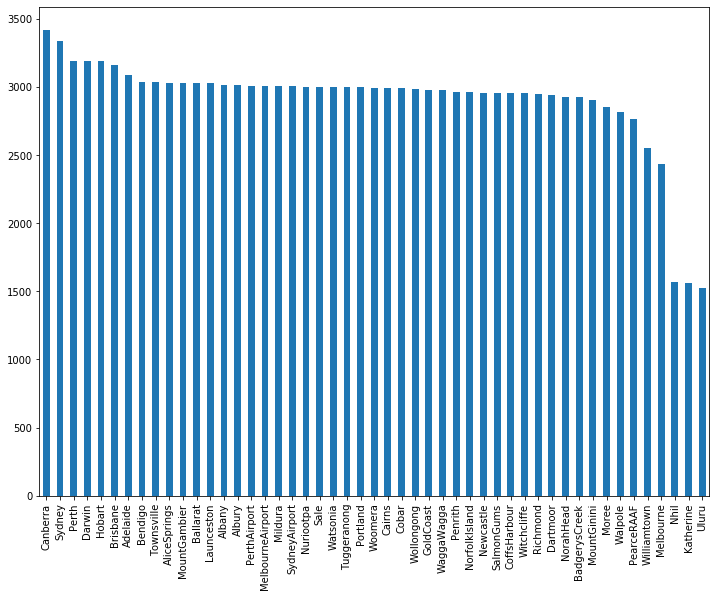

In [10]:
loc=df['Location']
loc.value_counts().plot(kind = 'bar',figsize = (12,9))

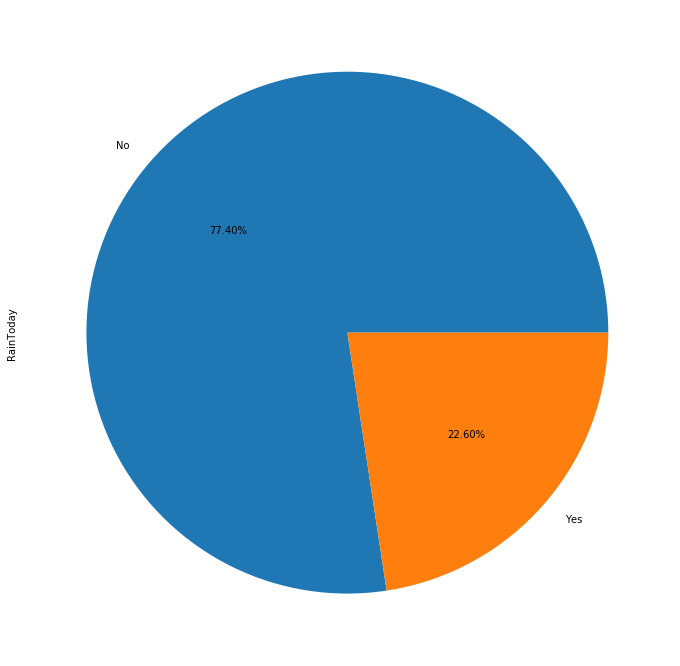

In [11]:
race_series = df['RainToday'].value_counts().plot(kind = 'pie',figsize = (12,12), autopct='%.2f%%')


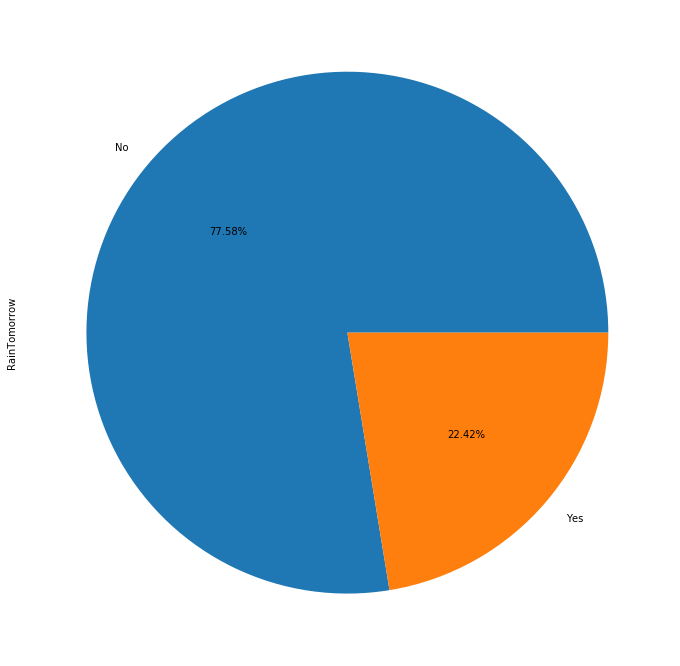

In [12]:
race_series = df['RainTomorrow'].value_counts().plot(kind = 'pie',figsize = (12,12), autopct='%.2f%%')

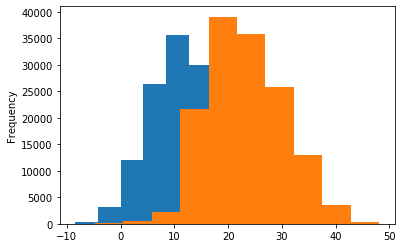

In [13]:
df['MinTemp'].plot(kind = 'hist')
df['MaxTemp'].plot(kind = 'hist')

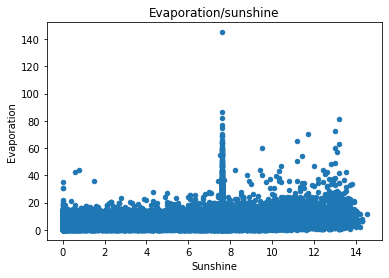

In [14]:
df.plot.scatter(x='Sunshine', y='Evaporation', title='Evaporation/sunshine')


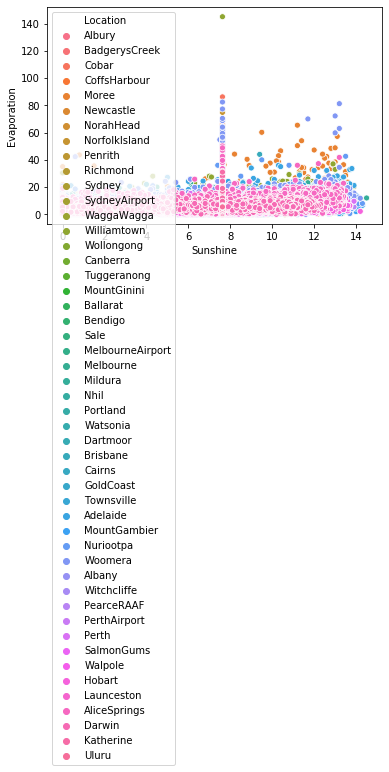

In [15]:
sns.scatterplot(x='Sunshine', y='Evaporation', hue='Location', data=df)

In [16]:
df["Location"]=df["Location"].astype('category')
df["Location"]=df["Location"].cat.codes

df["WindGustDir"]=df["WindGustDir"].astype('category')
df["WindGustDir"]=df["WindGustDir"].cat.codes

df["WindDir9am"]=df["WindDir9am"].astype('category')
df["WindDir9am"]=df["WindDir9am"].cat.codes

df["WindDir3pm"]=df["WindDir3pm"].astype('category')
df["WindDir3pm"]=df["WindDir3pm"].cat.codes

df["RainToday"]=df["RainToday"].astype('category')
df["RainToday"]=df["RainToday"].cat.codes

df["RainTomorrow"]=df["RainTomorrow"].astype('category')
df["RainTomorrow"]=df["RainTomorrow"].cat.codes

In [17]:
print(df.dtypes)

Location            int8
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir         int8
WindGustSpeed    float64
WindDir9am          int8
WindDir3pm          int8
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday           int8
RainTomorrow        int8
dtype: object


In [18]:
def normalize(df,columns):
    result = df.copy()
    for feature_name in columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        mean = df[feature_name].mean()
        SD = df[feature_name].std()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
        #result[feature_name] = (df[feature_name] -mean)/SD
    return result


In [19]:
d=normalize(df,columns=['Location','MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustDir','WindGustSpeed','WindSpeed9am','WindSpeed3pm','WindDir9am','WindDir3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm',])

In [20]:
d.mean()


Location         0.494597
MinTemp          0.487887
MaxTemp          0.529807
Rainfall         0.006334
Evaporation      0.037723
Sunshine         0.525852
WindGustDir      0.522815
WindGustSpeed    0.263444
WindDir9am       0.486012
WindDir3pm       0.516032
WindSpeed9am     0.107708
WindSpeed3pm     0.214225
Humidity9am      0.688438
Humidity3pm      0.514826
Pressure9am      0.614112
Pressure3pm      0.610531
Cloud9am         0.493021
Cloud3pm         0.500352
Temp9am          0.510285
Temp3pm          0.519909
RainToday        0.225960
RainTomorrow     0.224181
dtype: float64

In [21]:
d.std()

Location         0.296615
MinTemp          0.150682
MaxTemp          0.134396
Rainfall         0.022704
Evaporation      0.021849
Sunshine         0.188616
WindGustDir      0.305794
WindGustSpeed    0.101848
WindDir9am       0.301461
WindDir3pm       0.305494
WindSpeed9am     0.068085
WindSpeed3pm     0.100248
Humidity9am      0.189321
Humidity3pm      0.205321
Pressure9am      0.111508
Pressure3pm      0.106909
Cloud9am         0.253120
Cloud3pm         0.233857
Temp9am          0.136544
Temp3pm          0.131877
RainToday        0.418215
RainTomorrow     0.417043
dtype: float64

In [22]:
def zzz(df,columns):
    result = df.copy()
    for feature_name in columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        mean = df[feature_name].mean()
        SD = df[feature_name].std()
        #result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
        result[feature_name] = (df[feature_name] -mean)/SD
    return result


In [23]:
dd=zzz(d,columns=['Location','MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustDir','WindGustSpeed','WindSpeed9am','WindSpeed3pm','WindDir9am','WindDir3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm',])

In [24]:
dd.mean()

Location        -5.850927e-13
MinTemp         -2.843081e-14
MaxTemp         -3.652477e-14
Rainfall         5.087786e-14
Evaporation     -9.145468e-13
Sunshine        -3.143714e-12
WindGustDir      7.075522e-13
WindGustSpeed   -5.736219e-13
WindDir9am       2.687849e-13
WindDir3pm       3.767562e-13
WindSpeed9am     4.226030e-13
WindSpeed3pm     3.939760e-13
Humidity9am     -2.169626e-13
Humidity3pm      2.630049e-13
Pressure9am      9.827222e-13
Pressure3pm     -5.470147e-14
Cloud9am         8.593790e-13
Cloud3pm         5.687282e-13
Temp9am         -5.041484e-14
Temp3pm          5.361067e-14
RainToday        2.259605e-01
RainTomorrow     2.241812e-01
dtype: float64

In [25]:
dd.std()

Location         1.000000
MinTemp          1.000000
MaxTemp          1.000000
Rainfall         1.000000
Evaporation      1.000000
Sunshine         1.000000
WindGustDir      1.000000
WindGustSpeed    1.000000
WindDir9am       1.000000
WindDir3pm       1.000000
WindSpeed9am     1.000000
WindSpeed3pm     1.000000
Humidity9am      1.000000
Humidity3pm      1.000000
Pressure9am      1.000000
Pressure3pm      1.000000
Cloud9am         1.000000
Cloud3pm         1.000000
Temp9am          1.000000
Temp3pm          1.000000
RainToday        0.418215
RainTomorrow     0.417043
dtype: float64

In [26]:
display(dd.corr())


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Location,1.000000,-0.006194,-0.020490,-0.003457,0.032114,0.002144,0.016617,0.069269,-0.013319,0.008650,...,-0.002065,0.011066,0.036492,0.046345,-0.010908,-0.015860,-0.015596,-0.022718,-0.002431,-0.003579
MinTemp,-0.006194,1.000000,0.733919,0.103314,0.353698,0.051907,-0.144075,0.173331,-0.053755,-0.158613,...,-0.232372,0.005913,-0.424357,-0.434034,0.061460,0.015902,0.897999,0.699828,0.056001,0.083717
MaxTemp,-0.020490,0.733919,1.000000,-0.074202,0.442214,0.331505,-0.213672,0.066329,-0.224045,-0.181807,...,-0.499777,-0.499725,-0.309093,-0.397422,-0.226776,-0.214469,0.880087,0.969735,-0.227409,-0.159087
Rainfall,-0.003457,0.103314,-0.074202,1.000000,-0.038186,-0.173011,0.044015,0.127250,0.084144,0.046954,...,0.221392,0.249609,-0.159676,-0.120366,0.171613,0.145848,0.011384,-0.077553,0.496519,0.236874
Evaporation,0.032114,0.353698,0.442214,-0.038186,1.000000,0.290375,-0.067474,0.147371,-0.072473,-0.044179,...,-0.377594,-0.289915,-0.211823,-0.231341,-0.152224,-0.147763,0.417323,0.429195,-0.140796,-0.089551
Sunshine,0.002144,0.051907,0.331505,-0.173011,0.290375,1.000000,-0.061968,-0.022479,-0.076166,-0.032479,...,-0.351980,-0.446849,0.030932,-0.015477,-0.537714,-0.559379,0.210174,0.349271,-0.239674,-0.327029
WindGustDir,0.016617,-0.144075,-0.213672,0.044015,-0.067474,-0.061968,1.000000,0.140921,0.380267,0.576962,...,0.064741,0.057536,-0.126664,-0.037130,0.066499,0.060763,-0.183396,-0.226187,0.128923,0.051827
WindGustSpeed,0.069269,0.173331,0.066329,0.127250,0.147371,-0.022479,0.140921,1.000000,0.044477,0.138196,...,-0.209272,-0.025822,-0.426600,-0.384642,0.052281,0.080202,0.146756,0.032274,0.150498,0.225264
WindDir9am,-0.013319,-0.053755,-0.224045,0.084144,-0.072473,-0.076166,0.380267,0.044477,1.000000,0.302331,...,0.124298,0.159173,-0.036714,0.050264,0.090553,0.057143,-0.137776,-0.229822,0.164191,0.039265
WindDir3pm,0.008650,-0.158613,-0.181807,0.046954,-0.044179,-0.032479,0.576962,0.138196,0.302331,1.000000,...,0.023814,-0.007245,-0.134756,-0.039302,0.047959,0.050093,-0.175070,-0.190848,0.122833,0.030877


In [27]:
df=dd

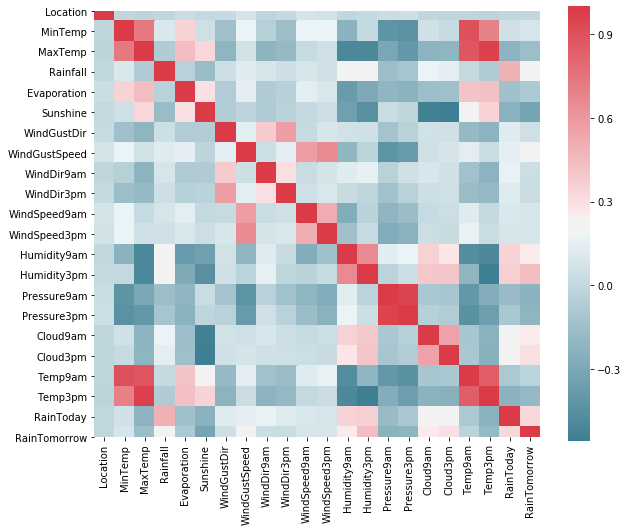

In [28]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [29]:
plt.style.use('ggplot')

In [30]:
X = df.drop('RainTomorrow',axis=1).values
y = df['RainTomorrow'].values

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)

In [32]:
neighbors = np.arange(1,20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [ ]:
for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

In [ ]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=18)

In [ ]:
#Fit the model
knn.fit(X_train,y_train)

In [ ]:
#Get accuracy.
knn.score(X_test,y_test)

In [ ]:
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred)

In [ ]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

In [ ]:
print("Precision Score is ", precision_score(y_test,y_pred))

In [ ]:
print("Recall Score is ", recall_score(y_test,y_pred))

In [ ]:
print("F1 Score: {}".format(f1_score(y_test,y_pred)))

In [ ]:
print(classification_report(y_test,y_pred))